In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.load_data_for_eda import load_data
from utils.effect_sizes import compute_effect_sizes_by_group, compute_effect_sizes_by_commodity
df = load_data('data/commodity_prices.csv')
df = compute_effect_sizes_by_group(df)
df = compute_effect_sizes_by_commodity(df)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", None)

In [36]:
def important_features(row, threshold=0.05):
    features = []
    for col in ['Commodity','Variety_Type','Season','Market','Year']:
        if row[f'eta2_{col}'] >= threshold:
            features.append(col)
    if not features:
        return 'None'
    else:
        return '|'.join(features)

df['important_features'] = df.apply(important_features, axis=1)

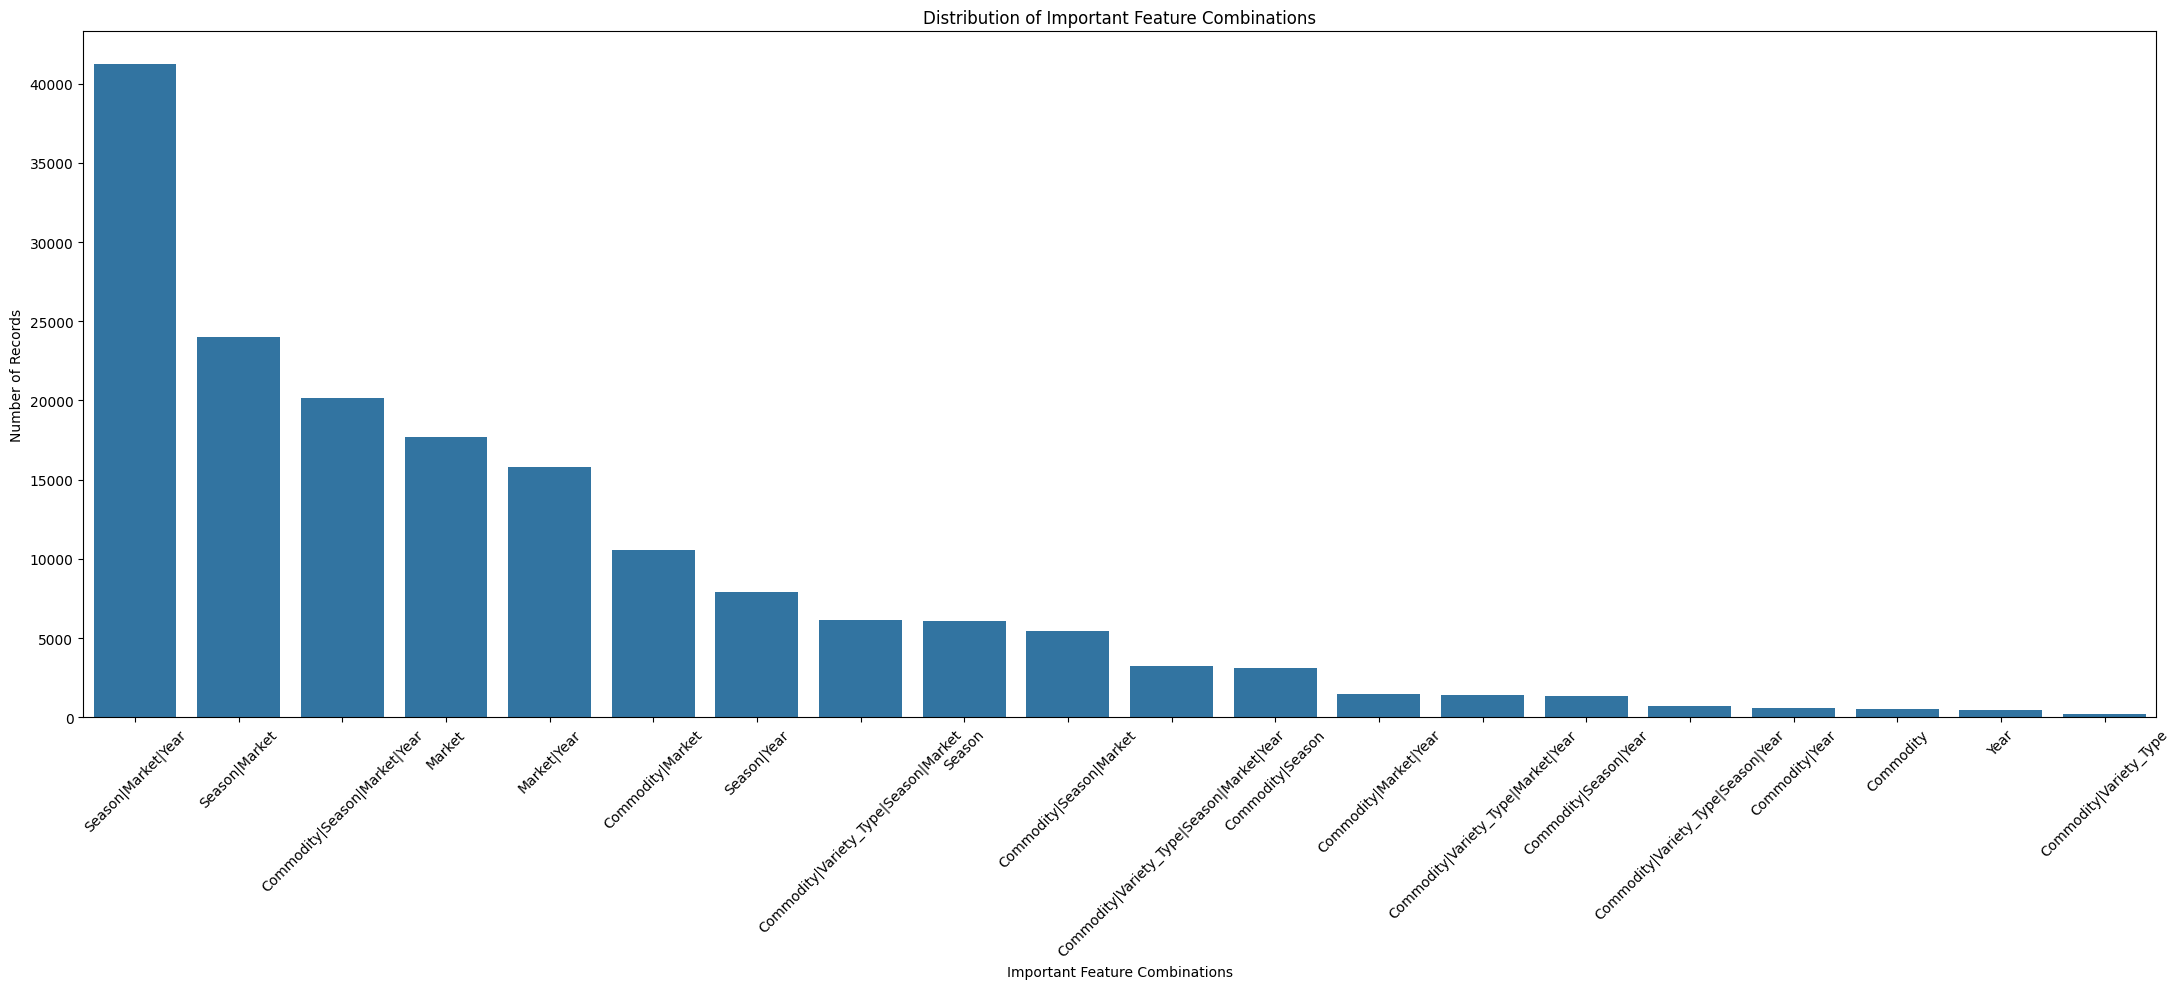

In [37]:
group_counts = df['important_features'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(22, 10))
sns.barplot(data=group_counts, x='important_features', y='count', ax=ax)
ax.set_title('Distribution of Important Feature Combinations')
ax.set_xlabel('Important Feature Combinations')
ax.set_ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
df_grouped = df.groupby('important_features').agg(
    Mean_Commodity_Effect_Size=('eta2_Commodity', 'mean'),
    Mean_Variety_Type_Effect_Size=('eta2_Variety_Type', 'mean'),
    Mean_Season_Effect_Size=('eta2_Season', 'mean'),
    Mean_Market_Effect_Size=('eta2_Market', 'mean'),
    Mean_Year_Effect_Size=('eta2_Year', 'mean'),
    Product_Types=('Product_Type', 'unique'),
    Product_count=('Product_Type', 'nunique'),
    Total_Records=('Product_Type', 'count')
    ).sort_values(by='Product_count', ascending=False).reset_index()
df_grouped


,important_features,Mean_Commodity_Effect_Size,Mean_Variety_Type_Effect_Size,Mean_Season_Effect_Size,Mean_Market_Effect_Size,Mean_Year_Effect_Size,Product_Types,Product_count,Total_Records
0,Season|Market|Year,0.005502,0.000019,0.151027,0.249317,0.164084,"[Amphophalus|Amphophalus|FAQ, Amphophalus|Other|FAQ, Ashgourd|Other|FAQ, Banana - Green|Banana - Green|FAQ, Banana - Green|Other|FAQ, Bitter gourd|Bitter Gourd|FAQ, Bitter gourd|Other|FAQ, Cabbage|Other|FAQ, Carrot|Carrot|FAQ, Carrot|Other|FAQ, Cauliflower|African Sarson|FAQ, Coconut Seed|Coconut Seed|FAQ, Elephant Yam (Suran)|Elephant Yam (Suran)|FAQ, Elephant Yam (Suran)|Other|FAQ, Ginger(Green)|Green Ginger|FAQ, Green Chilli|Other|FAQ, Mango (Raw-Ripe)|Mango - Raw-Ripe|FAQ, Papaya (Raw)|Other|FAQ, Papaya|Other|Large, Papaya|Papaya|Large, Pumpkin|Other|FAQ, Pumpkin|Pumpkin|FAQ, Tomato|Deshi|FAQ, Tomato|Tomato|FAQ]",24,41240
1,Commodity|Season|Market|Year,0.393194,0.020072,0.104457,0.296934,0.162726,"[Amaranthus|Other|FAQ, Banana|Nendra Bale|Large, Banana|Nendra Bale|Medium, Banana|Nendra Bale|Small, Banana|Poovan|Large, Banana|Poovan|Medium, Banana|Poovan|Small, Banana|Robusta|Medium, Banana|Robusta|Small, Capsicum|Capsicum|FAQ, Field Pea|Field Pea|FAQ, Onion|Other|FAQ, Onion|Small|FAQ, Pineapple|Pine Apple|Large, Pineapple|Pine Apple|Medium, Potato|Other|FAQ, Potato|Potato|FAQ]",17,20129
2,Season|Year,0.017117,0.000909,0.290129,0.012479,0.319728,"[Arecanut(Betelnut/Supari)|Supari|FAQ, Coconut Seed|Other|FAQ, Coriander(Leaves)|Coriander|FAQ, French Beans (Frasbean)|French Beans (Frasbean)|FAQ, Garlic|Average|FAQ, Garlic|Garlic|FAQ, Ginger(Green)|Other|FAQ, Leafy Vegetable|Other|FAQ, Lemon|Lemon|FAQ, Lemon|Other|FAQ, Mango|Other|Large, Mango|Other|Medium, Mint(Pudina)|Mint(Pudina)|FAQ, Rice|Jaya|FAQ, Sweet Potato|Hosur Green|FAQ]",15,7898
3,Season|Market,0.007251,0.000335,0.169145,0.320096,0.027823,"[Ashgourd|Ashgourd|FAQ, Bottle gourd|Bottle Gourd|FAQ, Brinjal|Arkasheela Mattigulla|FAQ, Cauliflower|Other|FAQ, Cluster beans|Cluster Beans|FAQ, Green Chilli|Green Chilly|FAQ, Little gourd (Kundru)|Other|FAQ, Mango (Raw-Ripe)|Other|FAQ, Ridgeguard(Tori)|Other|FAQ, Snakeguard|Other|FAQ, Tomato|Other|FAQ, Tomato|Other|Non-FAQ]",12,23978
4,Season,0.003623,0.000022,0.385430,0.022932,0.027705,"[Alsandikai|Alsandikai|FAQ, Coriander(Leaves)|Other|FAQ, Drumstick|Drumstick|FAQ, Drumstick|Other|FAQ, Egg|Egg|FAQ, Little gourd (Kundru)|Little gourd (Kundru)|FAQ, Long Melon(Kakri)|Other|FAQ, Orange|Other|Large, Sweet Potato|Other|FAQ, Tomato|Deshi|Non-FAQ, Water Melon|Water Melon|Large]",11,6061
5,Market|Year,0.012114,0.000000,0.031001,0.516844,0.145535,"[Beetroot|Beetroot|FAQ, Beetroot|Other|FAQ, Black pepper|Garbled|FAQ, Bottle gourd|Other|FAQ, Brinjal|Brinjal|FAQ, Brinjal|Other|FAQ, Cabbage|Cabbage|FAQ, Cauliflower|Cauliflower|FAQ, Colacasia|Colacasia|FAQ, Ginger(Dry)|Dry|FAQ]",10,15806
6,Market,0.002390,0.000000,0.023517,0.517286,0.026487,"[Bhindi(Ladies Finger)|Bhindi|FAQ, Bhindi(Ladies Finger)|Other|FAQ, Colacasia|Other|FAQ, Snakeguard|Snakeguard|FAQ, Tapioca|Other|FAQ, Tapioca|Tapioca|FAQ]",6,17664
7,Commodity|Season|Market,0.378414,0.012462,0.067873,0.219597,0.020358,"[Banana|Other|Large, Banana|Other|Medium, Banana|Robusta|Large, Cowpea(Veg)|Bean Barbati|FAQ, Cowpea(Veg)|Cowpea (Veg)|FAQ]",5,5429
8,Commodity|Variety_Type|Season|Market|Year,0.240064,0.263572,0.096619,0.192474,0.106064,"[Banana|Palayamthodan|Small, Onion|1st Sort|FAQ, Pineapple|Other|Large, Pineapple|Other|Small]",4,3264
9,Commodity|Season|Year,0.180488,0.000000,0.308404,0.000000,0.210701,"[Coconut|Coconut|FAQ, Cowpea(Veg)|Other|FAQ, Onion|Onion|FAQ, Potato|Big|FAQ]",4,1368


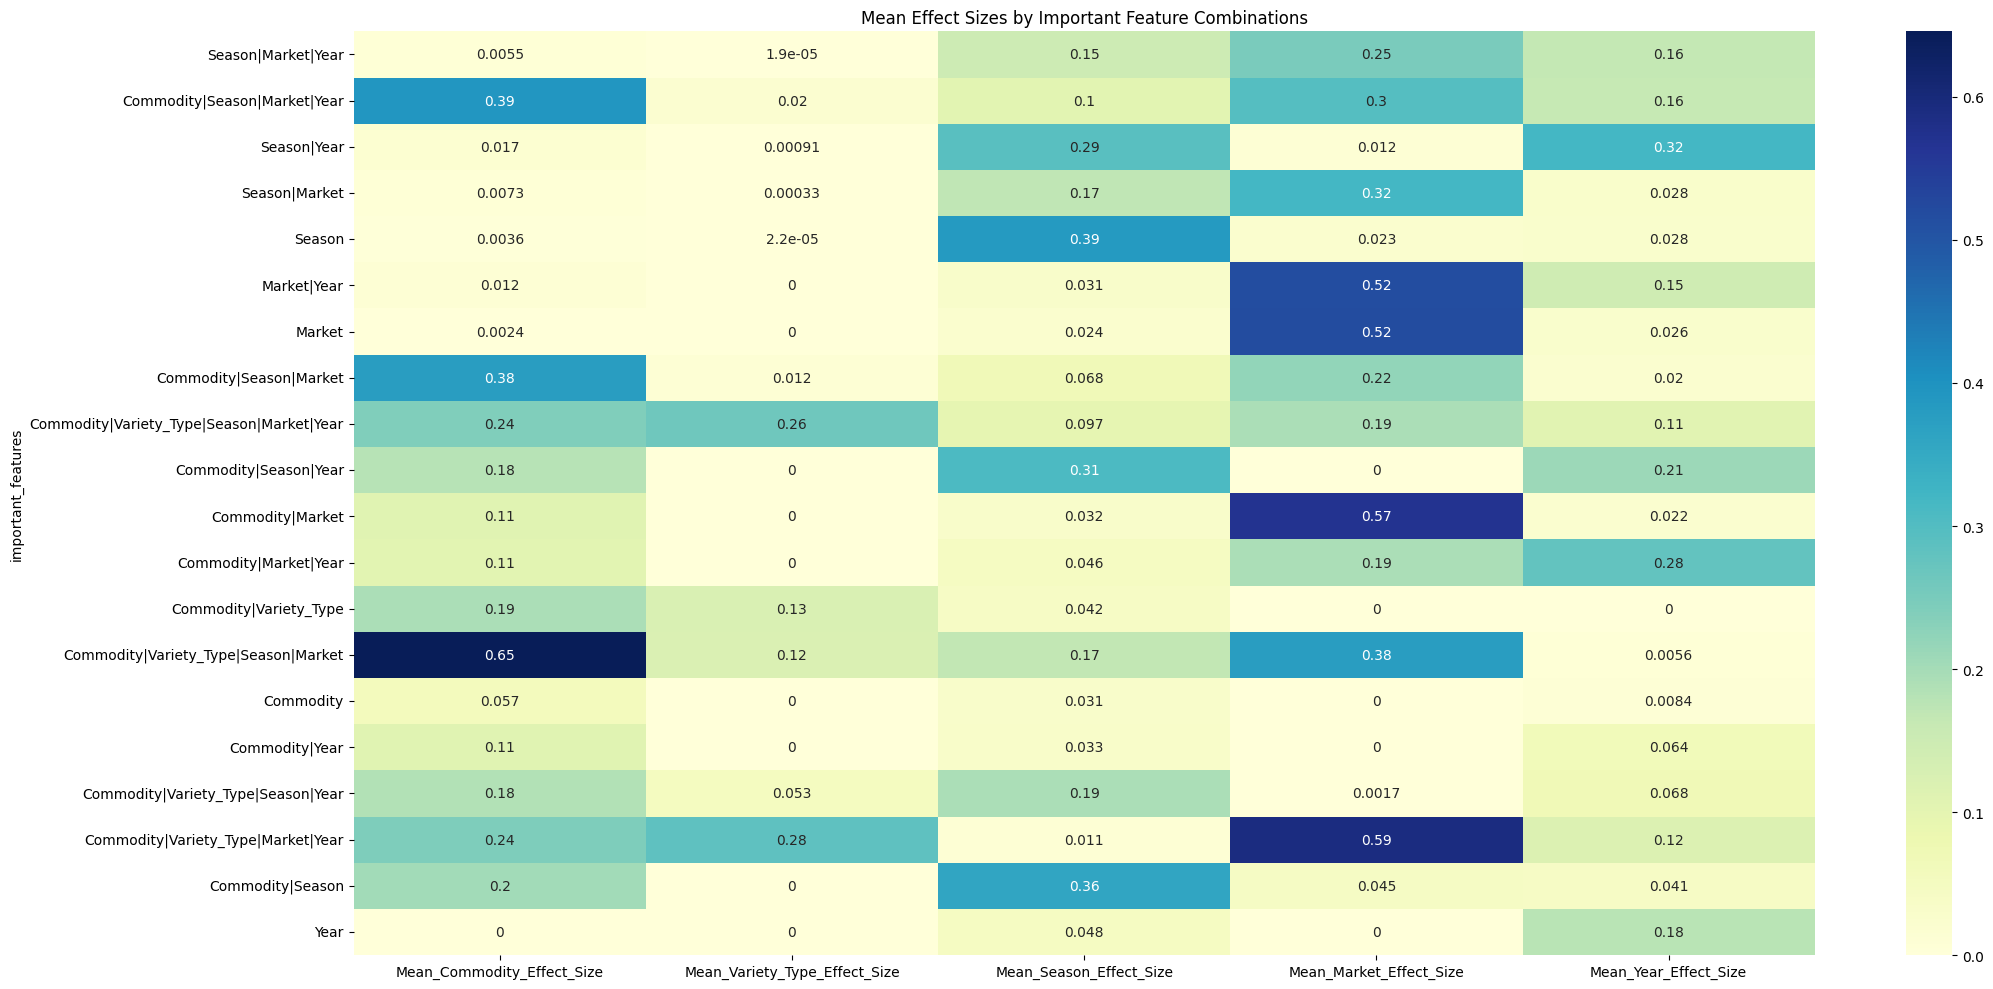

In [49]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.heatmap(data=df_grouped[['Mean_Commodity_Effect_Size', 'Mean_Variety_Type_Effect_Size', 'Mean_Season_Effect_Size', 'Mean_Market_Effect_Size', 'Mean_Year_Effect_Size']].set_index(df_grouped['important_features']), annot=True, cmap='YlGnBu', ax=ax)
ax.set_title('Mean Effect Sizes by Important Feature Combinations')
plt.tight_layout()
plt.show()

In [3]:
df[df['eta2_Commodity'] >= 0.1][['Product_Type', 'eta2_Commodity', 'omega2_Commodity']].drop_duplicates()

,Product_Type,eta2_Commodity,omega2_Commodity
471,Amaranthus|Amaranthus|FAQ,0.149755,0.149530
3648,Amaranthus|Other|FAQ,0.149755,0.149530
20696,Banana|Nendra Bale|Large,0.645850,0.645579
25696,Banana|Nendra Bale|Medium,0.645850,0.645579
25837,Banana|Nendra Bale|Small,0.645850,0.645579
25870,Banana|Other|Large,0.645850,0.645579
25945,Banana|Other|Medium,0.645850,0.645579
26028,Banana|Palayamthodan|Large,0.645850,0.645579
29555,Banana|Palayamthodan|Medium,0.645850,0.645579
32172,Banana|Palayamthodan|Small,0.645850,0.645579


In [4]:
df[df['eta2_Variety_Type'] >= 0.1][['Product_Type', 'eta2_Variety_Type', 'omega2_Variety_Type']].drop_duplicates()

,Product_Type,eta2_Variety_Type,omega2_Variety_Type
26028,Banana|Palayamthodan|Large,0.123560,0.123260
29555,Banana|Palayamthodan|Medium,0.123560,0.123260
32172,Banana|Palayamthodan|Small,0.123560,0.123260
126416,Onion|1st Sort|FAQ,0.199267,0.198114
127142,Onion|1st Sort|Non-FAQ,0.199267,0.198114
132863,Pineapple|Other|Large,0.284891,0.284471
134808,Pineapple|Other|Medium,0.284891,0.284471
136209,Pineapple|Other|Small,0.284891,0.284471


“While market, season, and year effects dominate overall, certain commodities (notably Banana, Pineapple, Onion) show strong within-commodity variety-level effects. This justifies treating Commodity and Variety as important features in price modeling.”

In [6]:
threshold = 0.05  # meaning feature explains <5% of variance, consider it negligible
df_basic = df[(df['eta2_Commodity'] < threshold) & 
              (df['eta2_Variety_Type'] < threshold) &
              (df['eta2_Season'] < threshold) &
              (df['eta2_Market'] < threshold) &
              (df['eta2_Year'] < threshold)]
df_basic

,Product_Type,Commodity,Variety_Type,Arrival_Date,Market,Is_VFPCK,Season,Year,Modal_Price,Max_Price,...,eta2_Season,omega2_Season,eta2_Market,omega2_Market,eta2_Year,omega2_Year,eta2_Commodity,omega2_Commodity,eta2_Variety_Type,omega2_Variety_Type


In [13]:
df_simple = df[(df['eta2_Market'] == 0.0) & (df['eta2_Year'] == 0.0)]

In [30]:
df[df['Product_Type'].str.contains('Coriander')]['Product_Type'].value_counts()

Product_Type
Coriander(Leaves)|Coriander|FAQ    449
Coriander(Leaves)|Other|FAQ        151
Name: count, dtype: int64

In [33]:
df[df['Product_Type'] == 'Coriander(Leaves)|Coriander|FAQ']['Season'].value_counts()

Season
Summer               142
Southwest Monsoon    129
Winter               108
Post Monsoon          70
Name: count, dtype: int64

In [32]:
df[df['Product_Type'] == 'Coriander(Leaves)|Other|FAQ']['Market'].value_counts()

Market
Piravam    151
Name: count, dtype: int64

In [16]:
df_simple['Product_Type'].value_counts()

Product_Type
Coriander(Leaves)|Other|FAQ      151
Orange|Other|Large               149
Sweet Potato|Other|FAQ           140
Tomato|Deshi|Non-FAQ             122
Water Melon|Water Melon|Large    119
Onion|1st Sort|Non-FAQ           108
Potato|(Red Nanital)|Non-FAQ     108
Long Melon(Kakri)|Other|FAQ       98
Egg|Egg|FAQ                       26
Name: count, dtype: int64

In [26]:
df_simple[['Product_Type', 'eta2_Season', 'omega2_Season']].drop_duplicates()

,Product_Type,eta2_Season,omega2_Season
83938,Coriander(Leaves)|Other|FAQ,0.175735,0.163685
97951,Egg|Egg|FAQ,0.500000,0.446809
122165,Long Melon(Kakri)|Other|FAQ,0.234177,0.216311
127142,Onion|1st Sort|Non-FAQ,0.035741,0.017216
131281,Orange|Other|Large,0.534722,0.526670
141142,Potato|(Red Nanital)|Non-FAQ,0.047642,0.029236
156151,Sweet Potato|Other|FAQ,0.359891,0.348916
163816,Tomato|Deshi|Non-FAQ,0.604214,0.595581
167831,Water Melon|Water Melon|Large,0.100681,0.084521


In [4]:
df['eta2_Market'].nunique(), df['omega2_Market'].nunique(), df['eta2_Season'].nunique(), df['omega2_Season'].nunique(), df['eta2_Year'].nunique(), df['omega2_Year'].nunique(), df['eta2_Commodity'].nunique(), df['omega2_Commodity'].nunique()

(98, 98, 124, 124, 112, 112, 1, 1)